# Mini-projeto 3: Carros usados
### Luiz Gustavo Oliveira
### gustavo.if.ufrj@gmail.com

In [53]:
# System imports
import os, subprocess, stat, matplotlib, time, colorsys, warnings, pickle
warnings.filterwarnings("ignore") # Ignoring 'future' warnings

# Scientific python import 
import numpy as np
import pandas as pd
from scipy import stats, optimize
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale = 1.5)

# Configurating matplotlib
%config InlineBackend.rc={'figure.figsize': (16, 9)}
matplotlib.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.size': 15})
%matplotlib inline

# It was already here!
from datetime import datetime

# Dump, load, parallel computing
from joblib import Parallel, delayed

In [2]:
# Dataset
clean_data_path = "/home/luga/Git/used-cars-dataset/autos.csv"
df = pd.read_csv(filepath_or_buffer = clean_data_path,
                 encoding = "latin-1")

#print(list(df.columns))
#['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
#'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
#'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']

In [54]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro

# Removendo outliers
x = df.yearOfRegistration[(df.yearOfRegistration >= 1950) & (df.yearOfRegistration <= 2020)]

# Criando histograma de ano de registro
x_ax = x.plot(kind = 'hist',
              range = [1900, 2025],
              bins = 45,
              color = 'green',
              alpha = 0.3,
              grid = True,
              title = "Distribuição de Veículos com base no Ano de Registro")

# Definindo limites no eixo x para cálculo do Kernel Density Estimator
x_ax.set_xlim(1900,2025)
x_ax.set_ylim(0,70000)
x_ax.set_xlabel("Ano de Registro")

# Kernel Density Estimator do histograma
kde_ax = x.plot(kind = 'kde', ax = x_ax,
                secondary_y = True,
                color = 'green',
                bw_method = 0.07)
kde_ax.set_ylabel("Densidade (KDE)")

# Definindo limites no eixo x para o plot de KDE
kde_ax.set_xlim(1900,2025)
kde_ax.set_ylim(0,0.07)

# Desenhando os plots
x_ax.set_ylabel("Frequência")
plt.show()

# Salvando o plot
plt.savefig("plots/Analise1/vehicle-distribution.png")

<Figure size 1152x648 with 0 Axes>

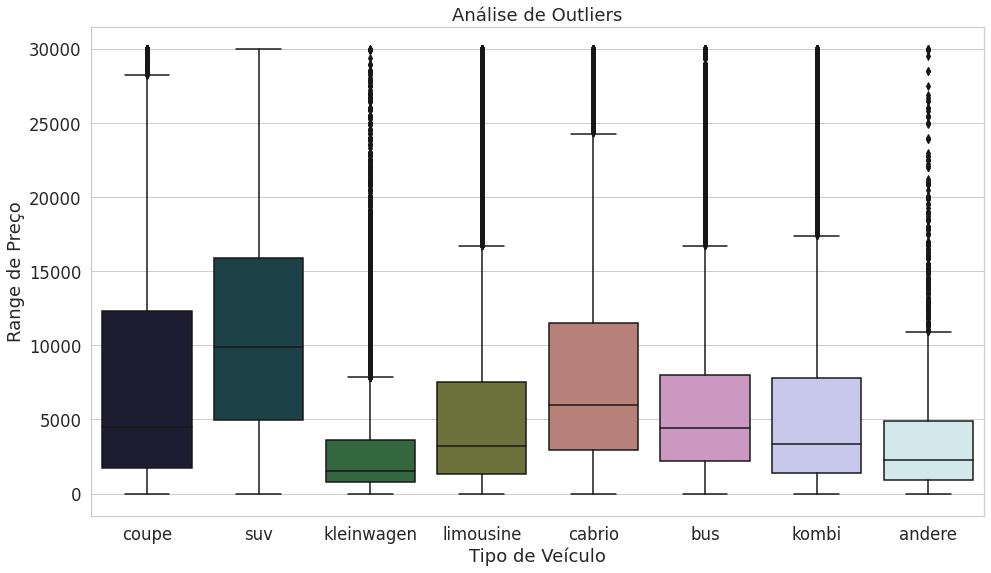

In [55]:
# Crie um Boxplot para avaliar os outliers

# Estabelecendo limites no preço
df1 = df[(df.price >= 0) & (df.price <= 3e4)]

# Boxplot de uma variável
plt.figure(figsize = [16, 9])
bp = sns.boxplot(y = 'price',
                 x = 'vehicleType',
                 data = df1,
                 palette = sns.color_palette("cubehelix", 8)
                ).set(xlabel = 'Tipo de Veículo',
                      ylabel = 'Range de Preço',
                      title = "Análise de Outliers")

# Salvando o plot
plt.savefig("plots/Analise1/price-vehicleType-boxplot.png")

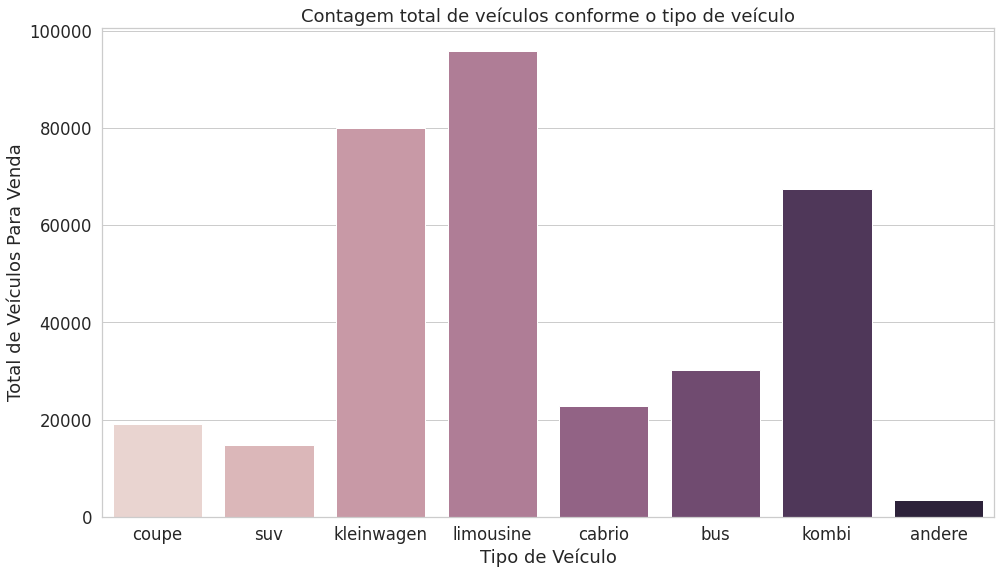

In [59]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 

# Countplot de uma variável
plt.figure(figsize = [16, 9])
cp = sns.countplot(x = 'vehicleType',
                   data = df,
                   palette = sns.cubehelix_palette(8)).set(xlabel = 'Tipo de Veículo',
                                                           ylabel = 'Total de Veículos Para Venda',
                                                           title = "Contagem total de veículos conforme o tipo de veículo")

# Salvando o plot
plt.savefig("plots/Analise1/count-vehicleType.png")